<h1 style='background:#0077BE; border:0; color:white; padding-top:15px; padding-bottom:15px; text-align: center;'>Global Shark Attacks</h1> 

![](../img/shark.png)

1. [Hipótesis a validar](#1.-Hipótesis-a-validar)
   <div style="padding: 0;margin: 0;">&nbsp;</div>
2. [Importar librerías](#2.-Importar-librerías)
   <div style="padding: 0;margin: 0;">&nbsp;</div>
3. [Otros DataSets](#3.-Otros-DataSets)
   <div style="padding: 0;margin: 0;">&nbsp;</div>
4. [Analizar datasets](#4.-Analizar-datasets)
  - [Explorar la estructura del DataSet Attacks](#Explorar-la-estructura-del-DataSet-Attacks)
  - [Analisis de los campos del DataSet Attacks](#Analisis-de-los-campos-del-DataSet-Attacks)
   <div style="padding: 0;margin: 0;">&nbsp;</div>
5. [Limpiar el DataSet Attacks](#5.-Limpiar-el-DataSet-Attacks)
  - [Generar código de país](#cod-pais)
  - [Limpiar campo Year](#limpiar-year)
   <div style="padding: 0;margin: 0;">&nbsp;</div>
6. [Limpiar DataSet población paises](#6.-Limpiar-DataSet-población-paises)
   <div style="padding: 0;margin: 0;">&nbsp;</div>
7. [Validar hipótesis](#7.-Validar-hipótesis)
  - [El número de supervivientes ha aumentado con el paso de los años](#hipotesis-superv-crecen-con-anios)
  - [Todos los ataques producidos en la India, ocurren a primera hora de la mañana](#ataques-india)
  - [La mayoría de los ataques en los últimos 200 años tuvieron lugar en USA, Australia y Sudáfrica](#ataques-ultimos-200-anios)
  - [La mayoría de los ataques de tiburón fueron fatales](#hipotesis-mayoria-fatales)
  - [Los tiburones tienen especial predilección por los surferos](#hipotesis-predileccion-por-surferos)
  - [Las actividades con más riesgo de sufrir un ataque de tiburon son pescar y nadar](#hipotesis-activ-mas-riesgo)
  - [Reunion Island es el lugar del mundo donde ocurren más ataques de tiburón en terminos relativos](#reunion-island)
  - [En Sudáfrica hay más ataques letales a mujeres que en Australia](#ataques-let-mujeres)

<h2 style='background:#0077BE; border:0; color:white; padding-top:10px; padding-bottom:10px; padding-left:20px;'>1. Hipótesis a validar</h2>

Hipótesis analizadas:
- El número de supervivientes ha aumentado con el paso de los años
- Todos los ataques producidos en la India, ocurren a primera hora de la mañana
- La mayoría de los ataques en los últimos 200 años tuvieron lugar en USA, Australia y Sudáfrica
- Las actividades con más riesgo de sufrir un ataque de tiburon son pescar y nadar
- La mayoría de los ataques de tiburón fueron fatales
- Los tiburones tienen especial predilección por los surferos
- Reunion Island es el lugar del mundo donde ocurren más ataques de tiburón en terminos relativos
- En Sudáfrica hay más ataques letales a mujeres que en Australia

<h2 style='background:#0077BE; border:0; color:white; padding-top:10px; padding-bottom:10px; padding-left:20px;'>2. Importar librerías</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)

<h2 style='background:#0077BE; border:0; color:white; padding-top:10px; padding-bottom:10px; padding-left:20px;'>3. Otros DataSets</h2>

**Department of Economic and Social Affairs - Population Dynamics**  
- Página Web: https://population.un.org/wpp/Download/Standard/Population/
- EXCEL descargado: [WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx](../input/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx)
- EXCEL procesado: [PoblacionPaises_1950-2020.xlsx](../output/PoblacionPaises_1950-2020.xlsx) 

<h2 style='background:#0077BE; border:0; color:white; padding-top:10px; padding-bottom:10px; padding-left:20px;'>4. Analizar datasets</h2>

In [176]:
shark_attacks = pd.read_csv("../input/attacks.csv", encoding='cp1252')
shark_attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[Ir a inicio](#Global-Shark-Attacks)

<h3 style='background:#0077BE; border:0; color:white; padding-top:8px; padding-bottom:8px; padding-left:25px;'>Explorar la estructura del DataSet Attacks</h3>

In [4]:
print(f"Dimensiones del DataFrame: {shark_attacks.shape[0]:,} filas y {shark_attacks.shape[1]} columnas".replace(',','.'))

Dimensiones del DataFrame: 25.723 filas y 24 columnas


In [5]:
print("DataFrame info:")
display(shark_attacks.info())

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species               

None

In [6]:
print("Columnas del DataFrame:")
display(shark_attacks.columns)
print("Tipo de cada columna:")
display(shark_attacks.dtypes)

Columnas del DataFrame:


Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

Tipo de cada columna:


Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [203]:
shark_attacks2 = shark_attacks.loc[:6301]
print(len(shark_attacks2))
shark_attacks2

6302


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [205]:
shark_attacks2 = shark_attacks.dropna(thresh = 10)
print(len(shark_attacks2))
shark_attacks2 

6302


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [206]:
nro_filas = shark_attacks2.shape[0]

print("Valores nulos en cada columna:")
suma_nulos_cols = shark_attacks2.isna().sum()
#display(suma_nulos_cols)
for campo, suma in suma_nulos_cols.items():
    print(f"{campo}:", f"{suma:,}".replace(',','.'), f"- {100 * suma/nro_filas:,.2f} %")

Valores nulos en cada columna:
Case Number: 1 - 0.02 %
Date: 0 - 0.00 %
Year: 2 - 0.03 %
Type: 4 - 0.06 %
Country: 50 - 0.79 %
Area: 455 - 7.22 %
Location: 540 - 8.57 %
Activity: 544 - 8.63 %
Name: 210 - 3.33 %
Sex : 565 - 8.97 %
Age: 2.831 - 44.92 %
Injury: 28 - 0.44 %
Fatal (Y/N): 539 - 8.55 %
Time: 3.354 - 53.22 %
Species : 2.838 - 45.03 %
Investigator or Source: 17 - 0.27 %
pdf: 0 - 0.00 %
href formula: 1 - 0.02 %
href: 0 - 0.00 %
Case Number.1: 0 - 0.00 %
Case Number.2: 0 - 0.00 %
original order: 0 - 0.00 %
Unnamed: 22: 6.301 - 99.98 %
Unnamed: 23: 6.300 - 99.97 %


In [8]:
print("Estadisticas numéricas:")
display(shark_attacks.describe().T)

Estadisticas numéricas:


,count,mean,std,min,25%,50%,75%,max
Year,6300.0,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
original order,6309.0,3155.999683,1821.396206,2.0,1579.0,3156.0,4733.0,6310.0


[Ir a inicio](#Global-Shark-Attacks)

<h3 style='background:#0077BE; border:0; color:white; padding-top:8px; padding-bottom:8px; padding-left:25px;'>Analisis de los campos del DataSet Attacks</h3>

In [5]:
display(shark_attacks['Type'].unique())

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

**Valores del campo Type**  
- *Boating*: paseo en barco
- *Unprovoked*: no provocado
- *Invalid*: inválido
- *Provoked*: provocado
- *Questionable*: cuestionable
- *Sea Disaster*: desastre de marítimo
- *Boat*: bote, parece que son los **Incidents involving watercraft**
- *Boatomg*: **probablemente sea un error** y en realidad sea Boating

**Unprovoked vs. Provoked**: GSAF defines a ***provoked incident*** as one in which the shark was speared, hooked, captured or in which a human drew "first blood". Although such incidents are of little interest to shark behaviorists, when the species of shark involved is known and pre-op photos of the wounds are available, the bite patterns are of value in determining species of shark involved in other cases when the species could not identified by the patient or witnesses. We know that a live human is rarely perceived as prey by a shark. Many incidents are motivated by curiosity, others may result when a shark perceives a human as a threat or competitor for a food source, and could be classed as "provoked" when examined from the shark's perspective.   

**Incidents involving watercraft**: Incidents in which a boat was bitten or rammed by a shark are in green. However, in cases in which the shark was hooked, netted or gaffed, the entry is orange because they are classed as provoked incidents.

**Questionable incidents**: Incidents in which there are insufficient data to determine if the injury was caused by a shark or the person drowned and the body was later scavenged by sharks. In a few cases, despite media reports to the contrary, evidence indicated there was no shark involvement whatsoever. Such incidents are in blue.

**Campo** ***Fatal (Y/N)***: 'Y' la persona no sobrevive al ataque, 'N' la persona sobrevive

In [45]:
shark_attacks[shark_attacks['Type'] == 'Boat']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
538,2014.06.27.R,Reported 27-Jun-2014,2014.0,Boat,ST. MARTIN,NaN,20 miles from shore,Transatlantic Rowing,Victor Mooney,M,...,Oceanic whitetip shark',"Star Advertiser, 6/272014; Goree Challenge.com",2014.06.27-Mooney.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.06.27.R,2014.06.27.R,5765.0,NaN,NaN
565,2014.04.12.R,Reported 12-Apr-2014,2014.0,Boat,SOUTH AFRICA,NaN,NaN,Shark watching,Inflatable boat,NaN,...,White shark,"You Tube, posted 4/12/2014",.2014.04.12.R-inflatable,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.04.12.R,2014.04.12.R,5738.0,NaN,NaN
706,2013.01.26,26-Jan-2013,2013.0,Boat,AUSTRALIA,Victoria,Cape Nelson,Fishing,"Occupants: Andrew & Ben Donegan & Joel Ryan,",M,...,"White shark, 5m","7NewsMelbourne, 1/28/2013",2013.01.26-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.01.26,2013.01.26,5597.0,NaN,NaN
818,2012.02.20,20-Feb-2012,2012.0,Boat,SOUTH AFRICA,Western Cape Province,Strandfontein,Fishing,8m inflatable boat. Occupants: Bhad Battle & K...,NaN,...,"White shark, 7m","Cape Argus, 2/21/2012",2012.02.20-StrandfonteinBoat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.02.20,2012.02.20,5485.0,NaN,NaN
864,2011.09.20,20-Sep-2011,2011.0,Boat,USA,Hawaii,Kauai,Canoeing,Tom Bartlett,M,...,NaN,"R. Mizutani, KHON2, 9/23/2011",2011.09.20-Bartlett.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2011.09.20,2011.09.20,5439.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6127,1804.02.26.R,Reported 26-Feb-1804,1804.0,Boat,AUSTRALIA,New South Wales,"Georges Head, off Port Jackson",NaN,boat,NaN,...,NaN,"Sydney Gazette, 2/26/1804",1804.02.26-boat-GeorgesHead.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1804.02.26.R,1804.02.26.R,176.0,NaN,NaN
6136,1788.05.10,10-May-1788,1788.0,Boat,AUSTRALIA,New South Wales,Sydney Harbor,Fishing,boat,NaN,...,NaN,"G.P. Whitley citing J. Cobley, Sydney Cove, p....",1788.05.10-Sydney,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1788.05.10,1788.05.10,167.0,NaN,NaN
6145,1776.00.00.b,1776,1776.0,Boat,GREENLAND,NaN,NaN,NaN,Occupants of skin boats,NaN,...,White sharks,T. Pennant,1776.00.00-Greenland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1776.00.00.b,1776.00.00.b,158.0,NaN,NaN
6212,ND-0107,Before 2004,0.0,Boat,MOZAMBIQUE,Inhambane Province,Off Inhambane,Fishing,"4.8-metre skiboat, Occupants: Rod Salm & 4 fri...",NaN,...,Whale shark,South African Shark Attack File,ND-0107-Inhambane.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0107,ND-0107,91.0,NaN,NaN


In [14]:
# TODO: Normalizar nombre de tipos de actividad, por si hay nombre pasecidos y dejar sólo uno.
# Ejemplo: 'Surf skiing' y 'Surf-skiing'
display(shark_attacks['Activity'].unique())
value_counts_activity = shark_attacks['Activity'].value_counts().to_frame()
value_counts_activity.rename(columns={"Activity": "Count"}, inplace=True)
value_counts_activity.index.name = 'Activity'
display(len(value_counts_activity))
# Descartar las activicades menos frecuentes ya que hay registrados 1.532 tipos de actividad
value_counts_activity2 = value_counts_activity[value_counts_activity['Count'] > 10]
display(value_counts_activity2)

array(['Paddling', 'Standing', 'Surfing', ...,
       'Crew swimming alongside their anchored ship',
       '4 men were bathing', 'Wreck of  large double sailing canoe'],
      dtype=object)

1532

,Count
Activity,
Surfing,971
Swimming,869
Fishing,431
Spearfishing,333
Bathing,162
Wading,149
Diving,127
Standing,99
Snorkeling,89


In [128]:
#shark_attacks[shark_attacks['Country'].notnull()]['Country'].unique()
countries = shark_attacks.loc[shark_attacks['Country'].notnull(),'Country'].unique()
countries.sort()
countries

array([' PHILIPPINES', ' TONGA', 'ADMIRALTY ISLANDS', 'AFRICA', 'ALGERIA',
       'AMERICAN SAMOA', 'ANDAMAN / NICOBAR ISLANDAS', 'ANDAMAN ISLANDS',
       'ANGOLA', 'ANTIGUA', 'ARGENTINA', 'ARUBA', 'ASIA?',
       'ATLANTIC OCEAN', 'AUSTRALIA', 'AZORES', 'BAHAMAS', 'BAHREIN',
       'BANGLADESH', 'BARBADOS', 'BAY OF BENGAL', 'BELIZE', 'BERMUDA',
       'BRAZIL', 'BRITISH ISLES', 'BRITISH NEW GUINEA',
       'BRITISH VIRGIN ISLANDS', 'BRITISH WEST INDIES', 'BURMA',
       'Between PORTUGAL & INDIA', 'CANADA', 'CAPE VERDE',
       'CARIBBEAN SEA', 'CAYMAN ISLANDS', 'CENTRAL PACIFIC', 'CEYLON',
       'CEYLON (SRI LANKA)', 'CHILE', 'CHINA', 'COLUMBIA', 'COMOROS',
       'COOK ISLANDS', 'COSTA RICA', 'CRETE', 'CROATIA', 'CUBA',
       'CURACAO', 'CYPRUS', 'Coast of AFRICA', 'DIEGO GARCIA', 'DJIBOUTI',
       'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT', 'EGYPT ',
       'EGYPT / ISRAEL', 'EL SALVADOR', 'ENGLAND',
       'EQUATORIAL GUINEA / CAMEROON', 'FALKLAND ISLANDS',
       'FEDERATED STA

In [22]:
display(shark_attacks['Species '].unique())
value_counts_species = shark_attacks['Species '].value_counts().to_frame()
value_counts_species.rename(columns={"Species ": "Count"}, inplace=True)
value_counts_species.index.name = 'Species'
display(len(value_counts_species))
# Descartar las especies menos frecuentes ya que hay registradas 1.549 especies
value_counts_species2 = value_counts_species[value_counts_species['Count'] > 10]
display(value_counts_species2)

array(['White shark', nan, '2 m shark', ..., "12' tiger shark",
       'Blue pointers',
       'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'],
      dtype=object)

1549

,Count
Species,
White shark,163
Shark involvement prior to death was not confirmed,105
Invalid,102
Shark involvement not confirmed,88
Tiger shark,73
Shark involvement prior to death unconfirmed,68
Bull shark,52
6' shark,40
4' shark,40


In [27]:
display(shark_attacks['Investigator or Source'].unique())
value_counts_inv_source = shark_attacks['Investigator or Source'].value_counts().to_frame()
value_counts_inv_source.rename(columns={"Investigator or Source": "Count"}, inplace=True)
value_counts_inv_source.index.name = 'Investigator or Source'
display(len(value_counts_inv_source))
# Descartar menos frecuentes ya que hay registradas 4.969 fuentes
value_counts_inv_source2 = value_counts_inv_source[value_counts_inv_source['Count'] > 10]
display(value_counts_inv_source2)

array(['R. Collier, GSAF', 'K.McMurray, TrackingSharks.com',
       'B. Myatt, GSAF', ..., 'F. Schwartz, p.23; C. Creswell, GSAF',
       'The Sun, 10/20/1938', 'S.W. Baker'], dtype=object)

4969

,Count
Investigator or Source,
"C. Moore, GSAF",105
"C. Creswell, GSAF",92
"S. Petersohn, GSAF",82
R. Collier,55
"R. Collier, GSAF",48
"T. Peake, GSAF",48
"M. Levine, GSAF",45
"A. Gifford, GSAF",28
C. Moore. GSAF,27


In [24]:
display(shark_attacks['Fatal (Y/N)'].value_counts())

N          4293
Y          1388
UNKNOWN      71
 N            7
N             1
M             1
y             1
2017          1
Name: Fatal (Y/N), dtype: int64

In [15]:
caso = shark_attacks[shark_attacks["Case Number"] == '2018.06.25']
print(caso['href formula'][0])
print(caso['href'][0])

http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf


[Ir a inicio](#Global-Shark-Attacks)

<h2 style='background:#0077BE; border:0; color:white; padding-top:10px; padding-bottom:10px; padding-left:20px;'>5. Limpiar el DataSet Attacks</h2>

In [208]:
shark_attacks_clean = shark_attacks.drop(columns = ["Unnamed: 22", "Unnamed: 23"])
shark_attacks_clean.rename(columns={"Sex ": "Gender", "Species ": "Species"}, inplace=True)
shark_attacks_clean

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
shark_attacks_clean = shark_attacks_clean.loc[:6301]
shark_attacks_clean

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [210]:
# Sustituir el tipo 'Boatomg' por 'Boating'
shark_attacks_clean.loc[shark_attacks_clean['Type'] == 'Boatomg','Type'] = 'Boating'
display(shark_attacks_clean['Type'].unique())

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat'], dtype=object)

In [211]:
# Unificar los tipos de actividad 'Surf skiing' y 'Surf-skiing'
shark_attacks_clean.loc[shark_attacks_clean['Activity'] == 'Surf skiing','Activity'] = 'Surf-skiing'

In [118]:
shark_attacks_clean.loc[shark_attacks_clean['Activity'] == 'Surf-skiing','Activity']

283     Surf-skiing
367     Surf-skiing
1291    Surf-skiing
1293    Surf-skiing
1316    Surf-skiing
1453    Surf-skiing
1543    Surf-skiing
1704    Surf-skiing
1722    Surf-skiing
1753    Surf-skiing
1830    Surf-skiing
1888    Surf-skiing
1893    Surf-skiing
2217    Surf-skiing
2394    Surf-skiing
2609    Surf-skiing
3046    Surf-skiing
4264    Surf-skiing
4361    Surf-skiing
4520    Surf-skiing
4554    Surf-skiing
4719    Surf-skiing
4825    Surf-skiing
4837    Surf-skiing
Name: Activity, dtype: object

In [212]:
# Quitando las filas con Type 'Questionable'
shark_attacks_clean = shark_attacks_clean[shark_attacks_clean['Type'] != 'Questionable']

In [213]:
# Normaliza el campo 'Fatal (Y/N)'
shark_attacks_clean.loc[shark_attacks_clean['Fatal (Y/N)'].notnull(), 'Fatal (Y/N)'] = shark_attacks_clean.loc[shark_attacks_clean['Fatal (Y/N)'].notnull(), 'Fatal (Y/N)'].apply(lambda x: str(x).strip().upper())
display(shark_attacks_clean['Fatal (Y/N)'].value_counts())

N          4299
Y          1389
UNKNOWN      71
2017          1
M             1
Name: Fatal (Y/N), dtype: int64

In [214]:
# Limpiar el campo 'Country'
shark_attacks_clean.loc[shark_attacks_clean['Country'].notnull(), 'Country'] = shark_attacks_clean.loc[shark_attacks_clean['Country'].notnull(), 'Country'].apply(lambda x: x.strip().upper())

In [215]:
# Unificar nombres de paises ()'REUNION' y 'REUNION ISLAND', 'SUDAN' y 'SUDAN?', ...)
shark_attacks_clean.loc[shark_attacks_clean['Country'] == 'REUNION','Country'] = 'REUNION ISLAND'
shark_attacks_clean.loc[shark_attacks_clean['Country'] == 'SUDAN?','Country'] = 'SUDAN'

In [216]:
shark_attacks_clean.loc[shark_attacks_clean['Country'] == 'CEYLON (SRI LANKA)','Country'] = 'CEYLON'

In [217]:
shark_attacks_clean.loc[shark_attacks_clean['Country'] == 'CEYLON','Country'] = 'SRI LANKA'

In [218]:
shark_attacks_clean.loc[shark_attacks_clean['Country'] == 'KOREA','Country'] = 'SOUTH KOREA'

In [219]:
shark_attacks_clean.loc[shark_attacks_clean['Country'] == 'ST. MAARTIN','Country'] = 'ST. MARTIN'

In [220]:
shark_attacks_clean.loc[shark_attacks_clean['Country'] == 'TOBAGO','Country'] = 'TRINIDAD & TOBAGO'

In [221]:
countries = shark_attacks_clean.loc[shark_attacks_clean['Country'].notnull()]['Country'].unique()
countries.sort()
countries

array(['ADMIRALTY ISLANDS', 'AFRICA', 'ALGERIA', 'AMERICAN SAMOA',
       'ANDAMAN / NICOBAR ISLANDAS', 'ANDAMAN ISLANDS', 'ANGOLA',
       'ANTIGUA', 'ARGENTINA', 'ARUBA', 'ASIA?', 'ATLANTIC OCEAN',
       'AUSTRALIA', 'AZORES', 'BAHAMAS', 'BAHREIN', 'BANGLADESH',
       'BARBADOS', 'BAY OF BENGAL', 'BELIZE', 'BERMUDA',
       'BETWEEN PORTUGAL & INDIA', 'BRAZIL', 'BRITISH ISLES',
       'BRITISH NEW GUINEA', 'BRITISH VIRGIN ISLANDS',
       'BRITISH WEST INDIES', 'BURMA', 'CANADA', 'CAPE VERDE',
       'CARIBBEAN SEA', 'CAYMAN ISLANDS', 'CENTRAL PACIFIC', 'CHILE',
       'CHINA', 'COAST OF AFRICA', 'COLUMBIA', 'COMOROS', 'COOK ISLANDS',
       'COSTA RICA', 'CRETE', 'CROATIA', 'CUBA', 'CURACAO', 'CYPRUS',
       'DIEGO GARCIA', 'DJIBOUTI', 'DOMINICAN REPUBLIC', 'ECUADOR',
       'EGYPT', 'EGYPT / ISRAEL', 'EL SALVADOR', 'ENGLAND',
       'EQUATORIAL GUINEA / CAMEROON', 'FALKLAND ISLANDS',
       'FEDERATED STATES OF MICRONESIA', 'FIJI', 'FRANCE',
       'FRENCH POLYNESIA', 'GABON', '

In [222]:
shark_attacks_clean.to_csv('../output/shark_attacks_clean.csv', index=False)

[Ir a inicio](#Global-Shark-Attacks)

<a id="cod-pais"></a><h3 style='background:#0077BE; border:0; color:white; padding-top:8px; padding-bottom:8px; padding-left:25px;'>Generar código de país</h3>

In [223]:
shark_attacks_clean = pd.read_csv("../output/shark_attacks_clean.csv")
shark_attacks_clean

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6296,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6297,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6298,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [224]:
shark_attacks_countries = shark_attacks_clean.loc[shark_attacks_clean['Country'].notnull()]['Country'].unique()
shark_attacks_countries.sort()
shark_attacks_countries = pd.DataFrame({'Country': shark_attacks_countries})
shark_attacks_countries

,Country
0,ADMIRALTY ISLANDS
1,AFRICA
2,ALGERIA
3,AMERICAN SAMOA
4,ANDAMAN / NICOBAR ISLANDAS
...,...
189,VENEZUELA
190,VIETNAM
191,WEST INDIES
192,WESTERN SAMOA


In [225]:
paises = pd.read_csv('../output/paises.csv')
paises

,Country code,Country name
0,4,AFGHANISTAN
1,8,ALBANIA
2,12,ALGERIA
3,16,AMERICAN SAMOA
4,20,ANDORRA
...,...,...
230,876,WALLIS AND FUTUNA ISLANDS
231,732,WESTERN SAHARA
232,887,YEMEN
233,894,ZAMBIA


In [110]:
merge_countries = pd.merge(shark_attacks_countries, paises, left_on = 'Country', right_on = 'Country name', how='left')
del merge_countries['Country name']
merge_countries

,Country,Country code
0,ADMIRALTY ISLANDS,NaN
1,AFRICA,NaN
2,ALGERIA,12.0
3,AMERICAN SAMOA,16.0
4,ANDAMAN / NICOBAR ISLANDAS,NaN
...,...,...
193,VENEZUELA,NaN
194,VIETNAM,NaN
195,WEST INDIES,NaN
196,WESTERN SAMOA,NaN


In [112]:
merge_countries.to_excel("../output/shark_attacks_countries.xlsx", sheet_name='Sheet_Countries') 

In [152]:
#shark_attacks_clean[shark_attacks_clean['Country'] == 'NEVIS']

In [226]:
xls_shark_attacks_countries = pd.ExcelFile('../output/shark_attacks_countries2.xlsx')
shark_attacks_countries = pd.read_excel(xls_shark_attacks_countries,'Sheet_Countries')
shark_attacks_countries.head()
shark_attacks_countries.drop(columns=['Unnamed: 0','Observaciones'],inplace=True)

In [227]:
shark_attacks_countries

,Country,Country code
0,ADMIRALTY ISLANDS,598.0
1,AFRICA,NaN
2,ALGERIA,12.0
3,AMERICAN SAMOA,16.0
4,ANDAMAN / NICOBAR ISLANDAS,NaN
...,...,...
193,VENEZUELA,862.0
194,VIETNAM,704.0
195,WEST INDIES,NaN
196,WESTERN SAMOA,882.0


In [228]:
dict_shark_attacks_countries = {}
for ind in shark_attacks_countries.index:
    dict_shark_attacks_countries[shark_attacks_countries.at[ind,'Country']] = shark_attacks_countries.at[ind,'Country code']

dict_shark_attacks_countries

{'ADMIRALTY ISLANDS': 598.0,
 'AFRICA': nan,
 'ALGERIA': 12.0,
 'AMERICAN SAMOA': 16.0,
 'ANDAMAN / NICOBAR ISLANDAS': nan,
 'ANDAMAN ISLANDS': 356.0,
 'ANGOLA': 24.0,
 'ANTIGUA': 28.0,
 'ARGENTINA': 32.0,
 'ARUBA': 533.0,
 'ASIA?': nan,
 'ATLANTIC OCEAN': nan,
 'AUSTRALIA': 36.0,
 'AZORES': 620.0,
 'BAHAMAS': 44.0,
 'BAHREIN': 48.0,
 'BANGLADESH': 50.0,
 'BARBADOS': 52.0,
 'BAY OF BENGAL': nan,
 'BELIZE': 84.0,
 'BERMUDA': 60.0,
 'BETWEEN PORTUGAL & INDIA': nan,
 'BRAZIL': 76.0,
 'BRITISH ISLES': 826.0,
 'BRITISH NEW GUINEA': 598.0,
 'BRITISH VIRGIN ISLANDS': 92.0,
 'BRITISH WEST INDIES': nan,
 'BURMA': 104.0,
 'CANADA': 124.0,
 'CAPE VERDE': 132.0,
 'CARIBBEAN SEA': nan,
 'CAYMAN ISLANDS': 136.0,
 'CENTRAL PACIFIC': nan,
 'CEYLON': 144.0,
 'CHILE': 152.0,
 'CHINA': 156.0,
 'COAST OF AFRICA': nan,
 'COLUMBIA': 170.0,
 'COMOROS': 174.0,
 'COOK ISLANDS': 184.0,
 'COSTA RICA': 188.0,
 'CRETE': 300.0,
 'CROATIA': 191.0,
 'CUBA': 192.0,
 'CURACAO': 531.0,
 'CYPRUS': 196.0,
 'DIEGO GARCIA':

In [229]:
shark_attacks_clean['Country code'] = shark_attacks_clean['Country'].map(dict_shark_attacks_countries)
shark_attacks_clean

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,...,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Country code
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,840.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,840.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,840.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,36.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,484.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,36.0
6296,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,36.0
6297,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,840.0
6298,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,591.0


In [230]:
shark_attacks_clean.to_csv('../output/shark_attacks_clean_codpais.csv', index=False)

[Ir a inicio](#Global-Shark-Attacks)

<a id="limpiar-year"></a><h3 style='background:#0077BE; border:0; color:white; padding-top:8px; padding-bottom:8px; padding-left:25px;'>Limpiar campo Year</h3>

In [9]:
display(shark_attacks['Year'].unique())

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [11]:
def limpiar_year(df_shark_attacks):
    # Elimino las observaciones sin año o con año inválido
    shark_attacks_aux = df_shark_attacks[(df_shark_attacks['Year'].notnull()) & (df_shark_attacks['Year'] > 1540)]
    # Convierto el campo Year a entero
    shark_attacks_aux = shark_attacks_aux.astype({'Year': 'int32'})

    return shark_attacks_aux

In [12]:
shark_attacks_aux = limpiar_year(shark_attacks)
shark_attacks_aux.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


[Ir a inicio](#Global-Shark-Attacks)

<h2 style='background:#0077BE; border:0; color:white; padding-top:10px; padding-bottom:10px; padding-left:20px;'>6. Limpiar DataSet población paises</h2>

In [88]:
xlsPobl = pd.ExcelFile('../output/PoblacionPaises_1950-2020.xlsx')
pobl_paises = pd.read_excel(xlsPobl,'ESTIMATES')
display(pobl_paises.head())
display(pobl_paises.info())

,Index,"Region, subregion, country or area",Country code,Type,Parent code,1950,1951,1952,1953,1954,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,25,SUB-SAHARAN AFRICA,947,SDG region,1828,179006.530,182372.741,185911.913,189614.211,193473.914,...,859610.523,883472.694,907933.933,932975.029,958577.201,984733.520,1011429.072,1038627.212,1066283.411,1094365.605
1,26,Eastern Africa,910,Subregion,947,66144.565,67602.806,69108.572,70668.596,72288.969,...,348907.786,358745.933,368825.235,379136.669,389671.295,400426.777,411396.724,422563.393,433904.943,445405.578
2,27,Burundi,108,Country/Area,910,2308.927,2360.442,2406.034,2449.089,2492.192,...,8958.406,9245.992,9540.302,9844.301,10160.034,10488.002,10827.010,11175.379,11530.577,11890.781
3,28,Comoros,174,Country/Area,910,159.459,163.146,166.538,169.748,172.853,...,706.578,723.865,741.511,759.390,777.435,795.597,813.890,832.322,850.891,869.595
4,29,Djibouti,262,Country/Area,910,62.000,63.313,64.744,66.273,67.884,...,853.671,868.136,883.296,898.707,913.998,929.117,944.100,958.923,973.557,988.002


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 76 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Index                               265 non-null    int64  
 1   Region, subregion, country or area  265 non-null    object 
 2   Country code                        265 non-null    int64  
 3   Type                                265 non-null    object 
 4   Parent code                         265 non-null    int64  
 5   1950                                265 non-null    float64
 6   1951                                265 non-null    float64
 7   1952                                265 non-null    float64
 8   1953                                265 non-null    float64
 9   1954                                265 non-null    float64
 10  1955                                265 non-null    float64
 11  1956                                265 non-n

None

In [89]:
pobl_paises = pobl_paises[pobl_paises['Type'] == 'Country/Area']
pobl_paises.drop(columns = ["Index", "Parent code"], inplace = True)
display(pobl_paises.head())

,"Region, subregion, country or area",Country code,Type,1950,1951,1952,1953,1954,1955,1956,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Burundi,108,Country/Area,2308.927,2360.442,2406.034,2449.089,2492.192,2537.150,2584.913,...,8958.406,9245.992,9540.302,9844.301,10160.034,10488.002,10827.010,11175.379,11530.577,11890.781
3,Comoros,174,Country/Area,159.459,163.146,166.538,169.748,172.853,175.906,178.946,...,706.578,723.865,741.511,759.390,777.435,795.597,813.890,832.322,850.891,869.595
4,Djibouti,262,Country/Area,62.000,63.313,64.744,66.273,67.884,69.593,71.494,...,853.671,868.136,883.296,898.707,913.998,929.117,944.100,958.923,973.557,988.002
5,Eritrea,232,Country/Area,822.347,835.000,849.258,864.893,881.761,899.746,918.849,...,3213.969,3250.104,3281.453,3311.444,3342.818,3376.558,3412.894,3452.797,3497.117,3546.427
6,Ethiopia,231,Country/Area,18128.030,18466.973,18819.701,19184.288,19560.012,19947.291,20347.810,...,90139.928,92726.982,95385.793,98094.264,100835.453,103603.461,106399.926,109224.410,112078.727,114963.583


In [90]:
pobl_paises['Country name'] = pobl_paises['Region, subregion, country or area'].apply(lambda x: x.strip().upper())
display(pobl_paises.head())

,"Region, subregion, country or area",Country code,Type,1950,1951,1952,1953,1954,1955,1956,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Country name
2,Burundi,108,Country/Area,2308.927,2360.442,2406.034,2449.089,2492.192,2537.150,2584.913,...,9245.992,9540.302,9844.301,10160.034,10488.002,10827.010,11175.379,11530.577,11890.781,BURUNDI
3,Comoros,174,Country/Area,159.459,163.146,166.538,169.748,172.853,175.906,178.946,...,723.865,741.511,759.390,777.435,795.597,813.890,832.322,850.891,869.595,COMOROS
4,Djibouti,262,Country/Area,62.000,63.313,64.744,66.273,67.884,69.593,71.494,...,868.136,883.296,898.707,913.998,929.117,944.100,958.923,973.557,988.002,DJIBOUTI
5,Eritrea,232,Country/Area,822.347,835.000,849.258,864.893,881.761,899.746,918.849,...,3250.104,3281.453,3311.444,3342.818,3376.558,3412.894,3452.797,3497.117,3546.427,ERITREA
6,Ethiopia,231,Country/Area,18128.030,18466.973,18819.701,19184.288,19560.012,19947.291,20347.810,...,92726.982,95385.793,98094.264,100835.453,103603.461,106399.926,109224.410,112078.727,114963.583,ETHIOPIA


In [91]:
pobl_paises.to_csv('../output/poblacion_paises.csv', index=False)

In [99]:
paises = pobl_paises[['Country code','Country name']]
paises.sort_values(by='Country name', inplace=True)
paises.reset_index(drop=True, inplace=True)
paises

,Country code,Country name
0,4,AFGHANISTAN
1,8,ALBANIA
2,12,ALGERIA
3,16,AMERICAN SAMOA
4,20,ANDORRA
...,...,...
230,876,WALLIS AND FUTUNA ISLANDS
231,732,WESTERN SAHARA
232,887,YEMEN
233,894,ZAMBIA


In [100]:
paises.to_csv('../output/paises.csv', index=False)

In [ ]:
#shark_attacks_clean = pd.read_csv("../output/shark_attacks_clean.csv")
#shark_attacks_clean.head()

In [85]:
#merge_countries = pd.merge(pobl_paises, country_shark_attacks, left_on = 'CountryName1', right_on = 'Country')
#merge_countries

In [86]:
#country_shark_attacks[~country_shark_attacks['Country'].isin(merge_countries['Country'])]

In [87]:
#pobl_paises[~pobl_paises['Country name'].isin(merge_countries['Country'])]['Country name']

[Ir a inicio](#Global-Shark-Attacks)

<h2 style='background:#0077BE; border:0; color:white; padding-top:10px; padding-bottom:10px; padding-left:20px;'>7. Validar hipótesis</h2>

<a id="hipotesis-superv-crecen-con-anios"></a><h3 style='background:#0077BE; border:0; color:white; padding-top:8px; padding-bottom:8px; padding-left:25px;'>El número de supervivientes ha aumentado con el paso de los años</h3>

In [13]:
shark_attacks_clean = pd.read_csv("../output/shark_attacks_clean.csv")
shark_attacks_clean.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper


In [14]:
# Crear shark_attacks_clean2:
# - Quitando las columnas pdf y href
shark_attacks_clean2 = shark_attacks_clean.loc[:,:"Investigator or Source"]

In [15]:
display(shark_attacks['Type'].unique())
display(shark_attacks_clean2['Type'].unique())
display(shark_attacks_clean2.shape)
display(shark_attacks_clean2.head())

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Sea Disaster',
       nan, 'Boat'], dtype=object)

(25721, 16)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper


In [16]:
display(shark_attacks_clean2['Fatal (Y/N)'].value_counts())
# display(shark_attacks_clean2['Year'].value_counts().sort_values())

N          4299
Y          1389
UNKNOWN      71
2017          1
M             1
Name: Fatal (Y/N), dtype: int64

In [17]:
# Elimino observaciones con un valor erróneo o desconocido en el campo 'Fatal (Y/N)',
# ya que este campo es necesario para deterninar si se sobrevive o no al ataque.
shark_attacks_supervivientes = shark_attacks_clean2[(shark_attacks_clean2['Fatal (Y/N)'] == 'Y') | (shark_attacks_clean2['Fatal (Y/N)'] == 'N')]
display(shark_attacks_supervivientes.shape)

(5688, 16)

In [122]:
display(shark_attacks_supervivientes['Year'].unique())

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1988., 1987., 1986., 1985., 1983.,
       1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974.,
       1973., 1972., 1971., 1970., 1969., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921.,
       1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912.,
       1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903.,
       1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895., 1894.,
       1893., 1892.,

Para usar la función **limpiar_year** ejecutar la celda que está en esta [sección](#limpiar-year) del notebbok.

In [18]:
shark_attacks_supervivientes = limpiar_year(shark_attacks_supervivientes)
shark_attacks_supervivientes

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6160,1700.00.00.b,1700s,1700,Unprovoked,FRANCE,Côte d'Azur,Antibes,Bathing,seaman,M,NaN,Leg severed,N,NaN,White shark,"A. De Maddalena, citing Cazeils (1998)"
6161,1700.00.00.a,1700s,1700,Unprovoked,BARBADOS,NaN,NaN,Bathing,seaman from the York,M,NaN,FATAL,Y,NaN,NaN,"Tioga Eagle, 10.26/ 1842"
6166,1642.00.00,1642,1642,Unprovoked,USA,New York,Between Manhattan and The Bronx,Swimming,Antony Van Corlear,M,NaN,FATAL,Y,NaN,NaN,"Knickerbocker's History of New York, by Washin..."
6168,1580.01.10.R,Letter dated 10-Jan-1580,1580,Unprovoked,Between PORTUGAL & INDIA,NaN,NaN,Man fell overboard from ship. Those on board t...,male,M,NaN,"FATAL. ""Shark tore him to pieces.",Y,NaN,NaN,"G.P. Whitley, p. 10"


In [19]:
fatal_a_superviviente = {'N': 1, 'Y': 0}
shark_attacks_supervivientes['Survived'] = shark_attacks_supervivientes['Fatal (Y/N)'].map(fatal_a_superviviente)

In [21]:
#display(shark_attacks_supervivientes)
df_supervivientes_anio = shark_attacks_supervivientes.groupby(['Year'])['Survived'].aggregate(['count', 'sum'])
df_supervivientes_anio

,count,sum
Year,,
1543,1,0
1580,1,0
1642,1,0
1700,3,1
1703,1,1
...,...,...
2014,118,111
2015,130,121
2016,118,113


array([1543, 1563, 1583, 1603, 1623, 1643, 1663, 1683, 1703, 1723, 1743,
       1763, 1783, 1803, 1823, 1843, 1863, 1883, 1903, 1923, 1943, 1963,
       1983, 2003, 2018], dtype=int64)

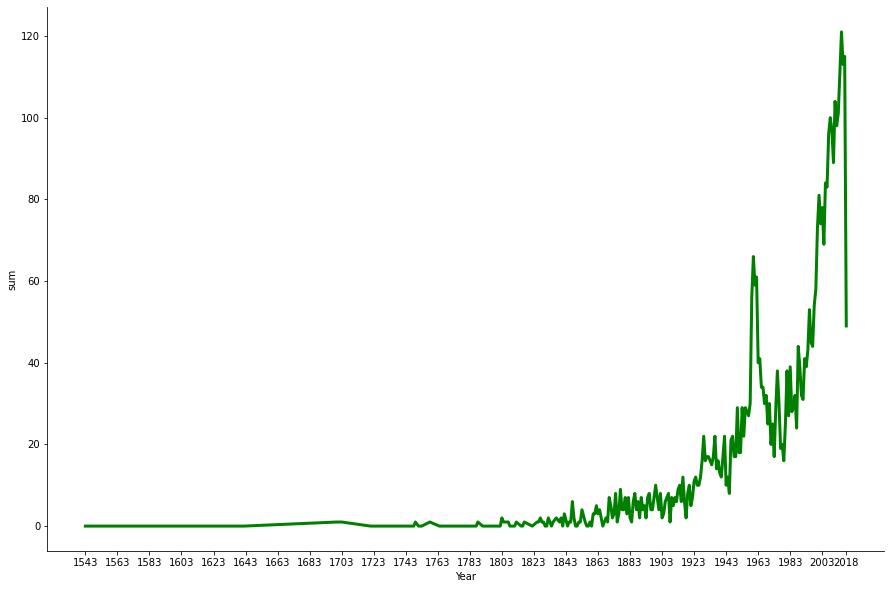

In [22]:
fig_supervivientes_anio, ax_supervivientes_anio = plt.subplots(1, figsize=(15,10))
sns.lineplot(data = df_supervivientes_anio,
             x = 'Year',
             y = 'sum',
             color = 'green',
             linewidth = 3)
xticks = np.arange(df_supervivientes_anio.index[0], df_supervivientes_anio.index[-1], 20)
xticks = np.append(xticks, df_supervivientes_anio.index[-1])
display(xticks)
ax_supervivientes_anio.set_xticks(xticks)
sns.despine()

In [128]:
fig_supervivientes_anio.savefig('../output/fig_supervivientes_anio.png')

En la gráfica anterior se aprecia una tendencia en el aumento de supervivientes a lo largo de los años,
aunque haya dientes de sierra.  
Aunque en 2018 hay un gran descenso en el número de supervivientes, en realidad hay 49 supervivientes de 50 casos.

La tendencia en el aumento de supervivientes a los largo de los años **valida** la hipótesis ***'El número de supervivientes ha aumentado con el paso de los años'***.

[Ir a inicio](#Global-Shark-Attacks)

<a id="ataques-india"></a><h3 style='background:#0077BE; border:0; color:white; padding-top:8px; padding-bottom:8px; padding-left:25px;'>Todos los ataques producidos en la India, ocurren a primera hora de la mañana</h3>

In [77]:
shark_attacks_clean = pd.read_csv("../output/shark_attacks_clean.csv")
display(shark_attacks_clean.head())

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [78]:
shark_attacks_india = shark_attacks_clean[shark_attacks_clean['Country'] == 'INDIA']
display(len(shark_attacks_india))
shark_attacks_india['Time'].value_counts()

40

Evening         2
12h00           1
17h00-18h00     1
10h00           1
Before 10h30    1
11h00           1
13h00           1
Name: Time, dtype: int64

Podemos **rechazar** la hipótesis porque en el campo *Time* aparecen valores '17h00-18h00' y 'Evening'.

[Ir a inicio](#Global-Shark-Attacks)

<a id="ataques-ultimos-200-anios"></a><h3 style='background:#0077BE; border:0; color:white; padding-top:8px; padding-bottom:8px; padding-left:25px;'>La mayoría de los ataques en los últimos 200 años tuvieron lugar en USA, Australia y Sudáfrica</h3>

In [46]:
shark_attacks_clean = pd.read_csv("../output/shark_attacks_clean.csv")
shark_attacks_clean.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [54]:
# Quedarnos sólo con las columnas "Year" y "Country"
shark_attacks_clean = shark_attacks_clean.loc[:,["Year","Country"]]
# Añadir un campo "Count"
shark_attacks_clean["Count"] = 1
shark_attacks_clean

,Year,Country,Count
0,2018.0,USA,1
1,2018.0,USA,1
2,2018.0,USA,1
3,2018.0,AUSTRALIA,1
4,2018.0,MEXICO,1
...,...,...,...
25716,NaN,NaN,1
25717,NaN,NaN,1
25718,NaN,NaN,1
25719,NaN,NaN,1


Para usar la función **limpiar_year** ejecutar la celda que está en esta [sección](#limpiar-year) del notebbok.

In [55]:
shark_attacks_ult_200 = limpiar_year(shark_attacks_clean)
shark_attacks_ult_200.head()

,Year,Country,Count
0,2018,USA,1
1,2018,USA,1
2,2018,USA,1
3,2018,AUSTRALIA,1
4,2018,MEXICO,1


In [56]:
max_year = shark_attacks_ult_200['Year'].max()
shark_attacks_ult_200 = shark_attacks_ult_200[shark_attacks_ult_200['Year'] >= (max_year - 200)]
shark_attacks_ult_200['Year'].unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969, 1988,
       1987, 1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976,
       1975, 1974, 1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965, 1964,
       1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953,
       1952, 1951, 1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943,
       1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932,
       1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921,
       1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910,
       1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899,
       1898, 1897, 1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889, 1888,
       1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878, 1877,
       1876, 1875, 1874, 1873, 1872, 1871, 1870, 18

In [69]:
shark_attacks_ult_200_sum = shark_attacks_ult_200.groupby(['Country'])['Count'].sum().to_frame()
shark_attacks_ult_200_sum.reset_index(inplace=True)
shark_attacks_ult_200_sum.sort_values(by=['Count'], ascending=False)

,Country,Count
193,USA,2202
13,AUSTRALIA,1313
161,SOUTH AFRICA,571
137,PAPUA NEW GUINEA,130
119,NEW ZEALAND,127
...,...,...
126,NORTH SEA,1
124,NORTH ATLANTIC OCEAN,1
121,NICARAGUA,1
50,EGYPT / ISRAEL,1


Hipótesis **validada**.

[Ir a inicio](#Global-Shark-Attacks)

<a id="hipotesis-mayoria-fatales"></a><h3 style='background:#0077BE; border:0; color:white; padding-top:8px; padding-bottom:8px; padding-left:25px;'>La mayoría de los ataques de tiburón fueron fatales</h3>

In [129]:
shark_attacks_clean = pd.read_csv("../output/shark_attacks_clean.csv")
shark_attacks_clean.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper


In [130]:
shark_attacks_fatales = shark_attacks_clean[(shark_attacks_clean['Fatal (Y/N)'] == 'Y') | (shark_attacks_clean['Fatal (Y/N)'] == 'N')]
display(shark_attacks_fatales.shape)

(5688, 16)

<AxesSubplot:xlabel='Fatal (Y/N)', ylabel='count'>

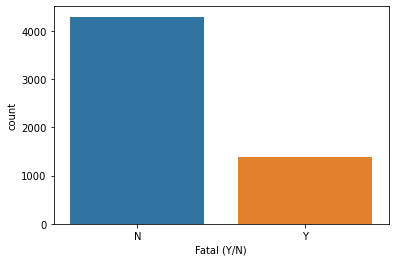

In [131]:
fig_fatal, ax_fatal = plt.subplots(1)
sns.countplot(shark_attacks_fatales['Fatal (Y/N)'], ax = ax_fatal)

In [132]:
fig_fatal.savefig('../output/fig_fatal.png')

Con la gráfica anterior podemos **rechazar** la hipótesis ***'La mayoría de los ataques de tiburón fueron fatales'***.

[Ir a inicio](#Global-Shark-Attacks)

<a id="hipotesis-predileccion-por-surferos"></a><h3 style='background:#0077BE; border:0; color:white; padding-top:8px; padding-bottom:8px; padding-left:25px;'>Los tiburones tienen especial predilección por los surferos</h3>

In [3]:
shark_attacks_clean = pd.read_csv("../output/shark_attacks_clean.csv")
shark_attacks_clean.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper


In [4]:
value_counts_activity = shark_attacks_clean['Activity'].value_counts().to_frame()
value_counts_activity.rename(columns={"Activity": "Count"}, inplace=True)
value_counts_activity.index.name = 'Activity'
display(len(value_counts_activity))
# Descartar las activicades menos frecuentes ya que hay registrados 1.532 tipos de actividad
value_counts_activity2 = value_counts_activity[value_counts_activity['Count'] > 20]
display(value_counts_activity2)
display(value_counts_activity2.index.values)

1532

,Count
Activity,
Surfing,969
Swimming,869
Fishing,431
Spearfishing,333
Bathing,162
Wading,149
Diving,127
Standing,99
Snorkeling,89


array(['Surfing', 'Swimming', 'Fishing', 'Spearfishing', 'Bathing',
       'Wading', 'Diving', 'Standing', 'Snorkeling', 'Scuba diving',
       'Body boarding', 'Body surfing', 'Swimming ', 'Kayaking',
       'Treading water', 'Fell overboard', 'Pearl diving', 'Free diving',
       'Boogie boarding'], dtype=object)

In [5]:
shark_attacks_activ = shark_attacks_clean[shark_attacks_clean['Activity'].isin(value_counts_activity2.index.values)]
shark_attacks_activ

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6294,ND.0006,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,FATAL,Y,NaN,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz..."
6295,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6296,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6297,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"


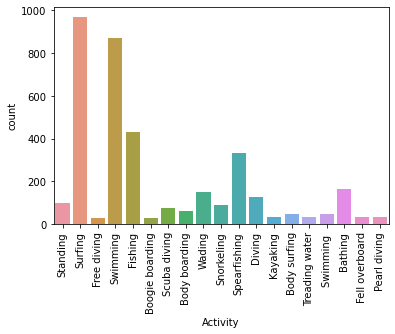

In [6]:
fig_activity, ax_activity = plt.subplots(1)
sns.countplot(shark_attacks_activ['Activity'], ax = ax_activity)
ax_activity.tick_params(axis='x', labelrotation = 90)

In [8]:
# La imagen se genera cortada
fig_activity.savefig('../output/fig_activity.png')

Podemos **rechazar** la hipótesis ***'Los tiburones tienen especial predilección por los surferos'***, porque con la gráfica anterior 
podemos ver que los tiburones no tienen especial predilección por suferos, en realidad tienen gran predilección tanto
por *suferos* como *nadadores*.

[Ir a inicio](#Global-Shark-Attacks)

<a id="hipotesis-activ-mas-riesgo"></a><h3 style='background:#0077BE; border:0; color:white; padding-top:8px; padding-bottom:8px; padding-left:25px;'>Las actividades con más riesgo de sufrir un ataque de tiburon son pescar y nadar</h3>

Podemos **rechazar** la hipótesis ***'Las actividades con más riesgo de sufrir un ataque de tiburon son pescar y nadar'***,
ya que en la siguiente gráfica vemos que las actividades con más riesgo son **sufear** y **nadar**.

<img src="../output/fig_activity.png" width="500px"/>

[Ir a inicio](#Global-Shark-Attacks)

<a id="reunion-island"></a><h3 style='background:#0077BE; border:0; color:white; padding-top:8px; padding-bottom:8px; padding-left:25px;'>Reunion Island es el lugar del mundo donde ocurren más ataques de tiburón en terminos relativos</h3>

In [231]:
shark_attacks_clean = pd.read_csv("../output/shark_attacks_clean_codpais.csv")
display(shark_attacks_clean.head())

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,...,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Country code
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,840.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,840.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,840.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,36.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,484.0


In [275]:
shark_attacks_clean['Year'].max()

2018.0

In [232]:
shark_attacks_clean["Count"] = 1
display(shark_attacks_clean.head())

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Country code,Count
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,840.0,1
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,840.0,1
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,840.0,1
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,36.0,1
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,484.0,1


In [273]:
# shark_attacks_clean[(shark_attacks_clean['Year'] == 1950) & (shark_attacks_clean['Country code'] == 36)]

In [243]:
# Paso 1
# Como el data set de población de los países contiene información desde 1950,
# vamos a calcular el número de ataques por año y pais desde 1950
ataques_anio_pais = shark_attacks_clean[shark_attacks_clean['Year'] >= 1950].groupby(['Year','Country code'])[['Count']].sum()
ataques_anio_pais.reset_index(inplace=True)
ataques_anio_pais

,Year,Country code,Count
0,1950.0,36.0,13
1,1950.0,144.0,2
2,1950.0,192.0,1
3,1950.0,222.0,1
4,1950.0,242.0,1
...,...,...,...
949,2018.0,540.0,2
950,2018.0,710.0,4
951,2018.0,764.0,2
952,2018.0,826.0,1


In [270]:
# Paso 2
# Calcular la media de ataques por país desde 1950
media_ataques_pais = ataques_anio_pais.groupby(['Country code'])[['Count']].mean()
media_ataques_pais.rename(columns={"Count": "MediaAtaques"}, inplace=True)
media_ataques_pais

,MediaAtaques
Country code,
16.0,1.000000
24.0,1.000000
28.0,1.000000
32.0,1.000000
36.0,11.565217
...,...
840.0,27.130435
858.0,1.000000
862.0,1.333333


In [244]:
# Población en miles de habitantes
pobl_paises = pd.read_csv('../output/poblacion_paises.csv')
pobl_paises

,"Region, subregion, country or area",Country code,Type,1950,1951,1952,1953,1954,1955,1956,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Country name
0,Burundi,108,Country/Area,2308.927,2360.442,2406.034,2449.089,2492.192,2537.150,2584.913,...,9245.992,9540.302,9844.301,10160.034,10488.002,10827.010,11175.379,11530.577,11890.781,BURUNDI
1,Comoros,174,Country/Area,159.459,163.146,166.538,169.748,172.853,175.906,178.946,...,723.865,741.511,759.390,777.435,795.597,813.890,832.322,850.891,869.595,COMOROS
2,Djibouti,262,Country/Area,62.000,63.313,64.744,66.273,67.884,69.593,71.494,...,868.136,883.296,898.707,913.998,929.117,944.100,958.923,973.557,988.002,DJIBOUTI
3,Eritrea,232,Country/Area,822.347,835.000,849.258,864.893,881.761,899.746,918.849,...,3250.104,3281.453,3311.444,3342.818,3376.558,3412.894,3452.797,3497.117,3546.427,ERITREA
4,Ethiopia,231,Country/Area,18128.030,18466.973,18819.701,19184.288,19560.012,19947.291,20347.810,...,92726.982,95385.793,98094.264,100835.453,103603.461,106399.926,109224.410,112078.727,114963.583,ETHIOPIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Bermuda,60,Country/Area,37.256,37.800,38.437,39.142,39.914,40.709,41.535,...,64.737,64.381,64.038,63.695,63.360,63.040,62.763,62.508,62.273,BERMUDA
231,Canada,124,Country/Area,13733.398,14078.449,14445.453,14834.905,15245.416,15673.764,16114.734,...,34922.031,35296.535,35664.338,36026.668,36382.942,36732.091,37074.558,37411.038,37742.157,CANADA
232,Greenland,304,Country/Area,22.993,23.466,23.936,24.465,25.092,25.846,26.727,...,56.477,56.412,56.383,56.378,56.408,56.473,56.565,56.660,56.772,GREENLAND
233,Saint Pierre and Miquelon,666,Country/Area,4.567,4.609,4.648,4.678,4.721,4.749,4.801,...,6.251,6.168,6.073,5.992,5.933,5.885,5.845,5.821,5.795,SAINT PIERRE AND MIQUELON


In [276]:
# Paso 3
# Calcular la media de población de cada país hasta 2018 (máximo año en el DataSet de ataques de tiburón)
def media_poblacion(row):
    return row['1950':'2018'].mean()

pobl_paises['PoblacionMedia'] = pobl_paises.apply(lambda x: media_poblacion(x), axis = 1)
pobl_media_paises = pobl_paises[['Country code','Country name','PoblacionMedia']]
pobl_media_paises

,Country code,Country name,PoblacionMedia
0,108,BURUNDI,5234.418116
1,174,COMOROS,398.580899
2,262,DJIBOUTI,445.281246
3,232,ERITREA,1949.351667
4,231,ETHIOPIA,48789.101130
...,...,...,...
230,60,BERMUDA,56.571899
231,124,CANADA,25596.608188
232,304,GREENLAND,47.602928
233,666,SAINT PIERRE AND MIQUELON,5.801986


In [277]:
# Paso 4
# Hacer join entre DataFrame con media de ataque y DataFrame con media de población
# y calcular el ratio de ataques por país = media de ataques por país / media de población (en miles de habitantes) por país
media_ataques_pobl_pais = pd.merge(media_ataques_pais, pobl_media_paises, left_on = 'Country code', right_on = 'Country code')
media_ataques_pobl_pais['ratio_ataques'] = media_ataques_pobl_pais['MediaAtaques'] / media_ataques_pobl_pais['PoblacionMedia']
media_ataques_pobl_pais

,Country code,MediaAtaques,Country name,PoblacionMedia,ratio_ataques
0,16.0,1.000000,AMERICAN SAMOA,39.527754,0.025299
1,24.0,1.000000,ANGOLA,12279.819580,0.000081
2,28.0,1.000000,ANTIGUA AND BARBUDA,67.422319,0.014832
3,32.0,1.000000,ARGENTINA,30129.892797,0.000033
4,36.0,11.565217,AUSTRALIA,15781.929217,0.000733
...,...,...,...,...,...
101,840.0,27.130435,UNITED STATES OF AMERICA,242207.004232,0.000112
102,858.0,1.000000,URUGUAY,2968.374159,0.000337
103,862.0,1.333333,VENEZUELA (BOLIVARIAN REPUBLIC OF),17492.492971,0.000076
104,882.0,1.000000,SAMOA,151.876522,0.006584


In [281]:
# Paso 5
# Ordenar por ratio de mayor a menor
media_ataques_pobl_pais.sort_values(by='ratio_ataques', ascending=False, inplace=True)
media_ataques_pobl_pais

,Country code,MediaAtaques,Country name,PoblacionMedia,ratio_ataques
79,654.0,2.000000,SAINT HELENA,5.877638e+00,3.402728e-01
97,796.0,1.666667,TURKS AND CAICOS ISLANDS,1.473665e+01,1.130967e-01
71,585.0,1.250000,PALAU,1.408052e+01,8.877512e-02
11,92.0,1.000000,BRITISH VIRGIN ISLANDS,1.580871e+01,6.325627e-02
80,663.0,1.000000,SAINT MARTIN (FRENCH PART),1.805461e+01,5.538752e-02
...,...,...,...,...,...
67,566.0,1.000000,NIGERIA,9.273580e+04,1.078332e-05
6,50.0,1.000000,BANGLADESH,9.382111e+04,1.065858e-05
41,360.0,1.222222,INDONESIA,1.620235e+05,7.543489e-06
40,356.0,1.250000,INDIA,8.049598e+05,1.552873e-06


In [283]:
# Como salen 106 registros, vamos a filtar
media_ataques_pobl_pais2 = media_ataques_pobl_pais[media_ataques_pobl_pais['ratio_ataques'] >= 1e-03]
print(len(media_ataques_pobl_pais2))
media_ataques_pobl_pais2

36


,Country code,MediaAtaques,Country name,PoblacionMedia,ratio_ataques
79,654.0,2.000000,SAINT HELENA,5.877638,0.340273
97,796.0,1.666667,TURKS AND CAICOS ISLANDS,14.736652,0.113097
71,585.0,1.250000,PALAU,14.080522,0.088775
11,92.0,1.000000,BRITISH VIRGIN ISLANDS,15.808710,0.063256
80,663.0,1.000000,SAINT MARTIN (FRENCH PART),18.054609,0.055388
70,584.0,1.666667,MARSHALL ISLANDS,36.081232,0.046192
14,136.0,1.000000,CAYMAN ISLANDS,26.387362,0.037897
0,16.0,1.000000,AMERICAN SAMOA,39.527754,0.025299
35,308.0,2.000000,GRENADA,96.365725,0.020754
7,60.0,1.100000,BERMUDA,56.571899,0.019444


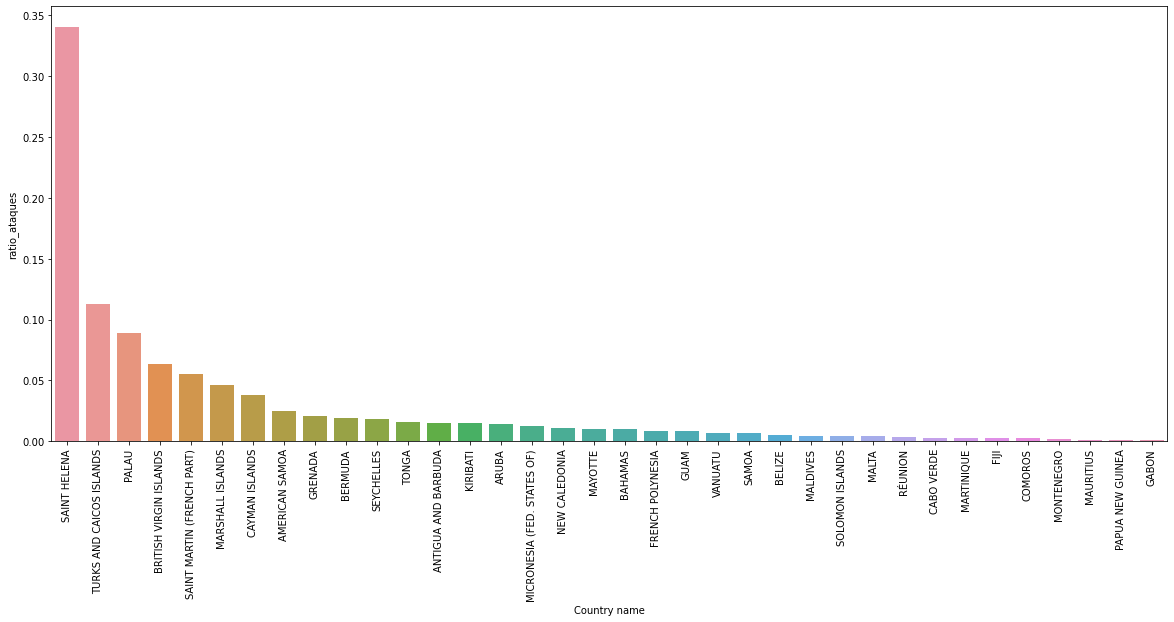

In [299]:
fig_reunion, ax_reunion = plt.subplots(1,figsize=(20,8))
sns.barplot(x = 'Country name',
            y = 'ratio_ataques',
            data = media_ataques_pobl_pais2,
            ci = None,
            ax = ax_reunion)
ax_reunion.tick_params(axis='x', labelrotation = 90)

In [300]:
# La imagen se genera cortada
fig_reunion.savefig('../output/fig_ratio_ataquesxpais.png')

In [304]:
trace = go.Choropleth(
            locations = media_ataques_pobl_pais2['Country name'],
            locationmode='country names',
            z = media_ataques_pobl_pais2['ratio_ataques'],
            text = media_ataques_pobl_pais2['Country name'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Ratio ataques',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Ratio ataques por país',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

Si consideramos *'ataques de tiburón en terminos relativos'* como la media de ataques por país entre los años 1950-2018 dividido por la media de la población de cada país entre 1950-2018, se **rechaza** la hipótesis **'Reunion Island es el lugar del mundo donde ocurren más ataques de tiburón en terminos relativos'**.

In [290]:
# Paso 2.b
# Calcular la suma de ataques por país desde 1950
suma_ataques_pais = ataques_anio_pais.groupby(['Country code'])[['Count']].sum()
suma_ataques_pais.rename(columns={"Count": "SumaAtaques"}, inplace=True)
suma_ataques_pais

,SumaAtaques
Country code,
16.0,3
24.0,1
28.0,1
32.0,1
36.0,798
...,...
840.0,1872
858.0,1
862.0,8


In [292]:
# Paso 4.b
# Hacer join entre DataFrame con suma de ataque y DataFrame con media de población
# y calcular el ratio de ataques por país = suma de ataques por país / media de población (en miles de habitantes) por país
ataques_pobl_pais = pd.merge(suma_ataques_pais, pobl_media_paises, left_on = 'Country code', right_on = 'Country code')
ataques_pobl_pais['ratio_ataques'] = ataques_pobl_pais['SumaAtaques'] / ataques_pobl_pais['PoblacionMedia']
ataques_pobl_pais

,Country code,SumaAtaques,Country name,PoblacionMedia,ratio_ataques
0,16.0,3,AMERICAN SAMOA,39.527754,0.075896
1,24.0,1,ANGOLA,12279.819580,0.000081
2,28.0,1,ANTIGUA AND BARBUDA,67.422319,0.014832
3,32.0,1,ARGENTINA,30129.892797,0.000033
4,36.0,798,AUSTRALIA,15781.929217,0.050564
...,...,...,...,...,...
101,840.0,1872,UNITED STATES OF AMERICA,242207.004232,0.007729
102,858.0,1,URUGUAY,2968.374159,0.000337
103,862.0,8,VENEZUELA (BOLIVARIAN REPUBLIC OF),17492.492971,0.000457
104,882.0,4,SAMOA,151.876522,0.026337


In [293]:
# Paso 5.b
# Ordenar por ratio de mayor a menor
ataques_pobl_pais.sort_values(by='ratio_ataques', ascending=False, inplace=True)
ataques_pobl_pais

,Country code,SumaAtaques,Country name,PoblacionMedia,ratio_ataques
5,44.0,93,BAHAMAS,2.286766e+02,0.406688
71,585.0,5,PALAU,1.408052e+01,0.355100
79,654.0,2,SAINT HELENA,5.877638e+00,0.340273
97,796.0,5,TURKS AND CAICOS ISLANDS,1.473665e+01,0.339290
63,540.0,48,NEW CALEDONIA,1.601979e+02,0.299629
...,...,...,...,...,...
78,643.0,4,RUSSIAN FEDERATION,1.353942e+05,0.000030
67,566.0,1,NIGERIA,9.273580e+04,0.000011
6,50.0,1,BANGLADESH,9.382111e+04,0.000011
40,356.0,5,INDIA,8.049598e+05,0.000006


In [295]:
# Como salen 106 registros, vamos a filtar
ataques_pobl_pais2 = ataques_pobl_pais[ataques_pobl_pais['ratio_ataques'] >= 1e-02]
print(len(ataques_pobl_pais2))
ataques_pobl_pais2

31


,Country code,SumaAtaques,Country name,PoblacionMedia,ratio_ataques
5,44.0,93,BAHAMAS,228.676580,0.406688
71,585.0,5,PALAU,14.080522,0.355100
79,654.0,2,SAINT HELENA,5.877638,0.340273
97,796.0,5,TURKS AND CAICOS ISLANDS,14.736652,0.339290
63,540.0,48,NEW CALEDONIA,160.197942,0.299629
70,584.0,10,MARSHALL ISLANDS,36.081232,0.277152
7,60.0,11,BERMUDA,56.571899,0.194443
92,776.0,15,TONGA,86.639101,0.173132
30,258.0,21,FRENCH POLYNESIA,171.170971,0.122684
80,663.0,2,SAINT MARTIN (FRENCH PART),18.054609,0.110775


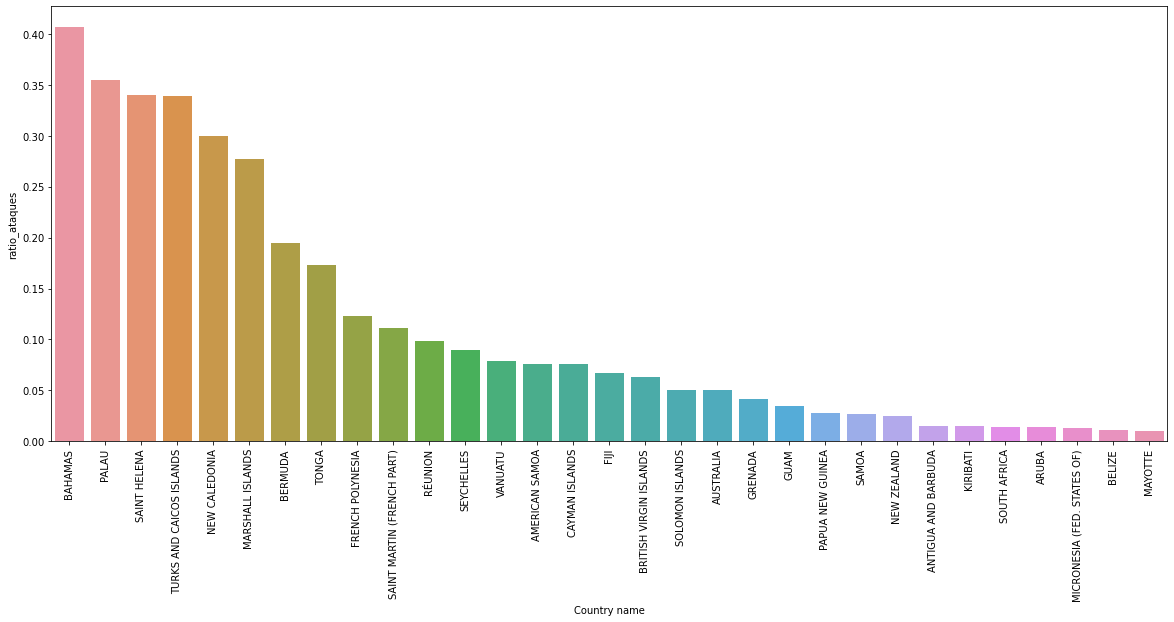

In [298]:
fig_reunion2, ax_reunion2 = plt.subplots(1,figsize=(20,8))
sns.barplot(x = 'Country name',
            y = 'ratio_ataques',
            data = ataques_pobl_pais2,
            ci = None,
            ax = ax_reunion2)
ax_reunion2.tick_params(axis='x', labelrotation = 90)

In [301]:
# La imagen se genera cortada
fig_reunion2.savefig('../output/fig_ratio_ataquesxpais2.png')

In [303]:
trace = go.Choropleth(
            locations = ataques_pobl_pais2['Country name'],
            locationmode='country names',
            z = ataques_pobl_pais2['ratio_ataques'],
            text = ataques_pobl_pais2['Country name'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Ratio ataques',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Ratio ataques por país',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

Si consideramos *'ataques de tiburón en terminos relativos'* como la suma de ataques por país entre los años 1950-2018 dividido por la media de la población de cada país entre 1950-2018, se **rechaza** la hipótesis **'Reunion Island es el lugar del mundo donde ocurren más ataques de tiburón en terminos relativos'**.

[Ir a inicio](#Global-Shark-Attacks)

<a id="ataques-let-mujeres"></a><h3 style='background:#0077BE; border:0; color:white; padding-top:8px; padding-bottom:8px; padding-left:25px;'>En Sudáfrica hay más ataques letales a mujeres que en Australia</h3>

In [79]:
shark_attacks_clean = pd.read_csv("../output/shark_attacks_clean.csv")
display(shark_attacks_clean.head())

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [82]:
# Generar dataframe con observaciones de Australia y Sudáfrica, de mujeres y con ataques letales (Fatal = 'Y')
sudafr_aust_mujer_letal = shark_attacks_clean[((shark_attacks_clean['Country'] == 'AUSTRALIA') | (shark_attacks_clean['Country'] == 'SOUTH AFRICA')) & (shark_attacks_clean['Gender'] == 'F') & (shark_attacks_clean['Fatal (Y/N)'] == 'Y')]
sudafr_aust_mujer_letal

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
153,2017.04.17.a,17-Apr-2017,2017.0,Unprovoked,AUSTRALIA,Western Australia,Kelpies near Wylie Bay,Surfing,Laeticia Brouwer,F,...,Y,16h00,White shark,"B. Myatt, GSAF",2017.04.17.a Brouwer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.17.a,2017.04.17.a,6148.0
265,2016.06.05.a,05-Jun-2016,2016.0,Unprovoked,AUSTRALIA,Western Australia,Mindarie,Diving,Doreen Collyer,F,...,Y,11h30,3+ m shark,"B. Myatt, GSAF",2016.06.05.a-Collyer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.06.05.a,2016.06.05.a,6036.0
567,2014.04.03,03-Apr-2014,2014.0,Unprovoked,AUSTRALIA,New South Wales,Tathra,Swimming,Christine Armstrong,F,...,Y,08h20,3 m to 4 m white shark,"B. Myatt, GSAF",2014.04.03-Armstrong.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.04.03,2014.04.03,5734.0
1510,2006.01.07,07-Jan-2006,2006.0,Unprovoked,AUSTRALIA,Queensland,"Amity Point, North Stradbroke Island",Swimming,Sarah Whiley,F,...,Y,17h15,Bull shark,"T. Peake, GSAF",2006.01.07-Whiley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.01.07,2006.01.07,4791.0
1621,2004.11.15,15-Nov-2004,2004.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Fish Hoek, False Bay",Swimming,Tyna Webb,F,...,Y,07h00,6 m [20'] white shark,"J.P. Botha, GSAF",2004.11.15-TynaWebb.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.11.15,2004.11.15,4680.0
2492,1993.06.05,05-Jun-1993,1993.0,Unprovoked,AUSTRALIA,Tasmania,Tenth Island (King Island),Scuba diving at seal colony,Teresa Cartwright,F,...,Y,10h55,5 m [16.5'] white shark,"Telegraph Mirror (Sydney), June 7, 1993; H. Ed...",1993.06.05-Cartwright.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1993.06.05,1993.06.05,3809.0
2629,1990.06.24,24-Jun-1990,1990.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Mossel Bay,Scuba diving (but on surface),Monique Price,F,...,Y,15h45,"4.5 m [14'9""] white shark","A Gifford, G. Cliff, GSAF",1990.06.24 - Price.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1990.06.24,1990.06.24,3672.0
2855,1985.03.03,03-Mar-1985,1985.0,Unprovoked,AUSTRALIA,South Australia,"Wiseman’s Beach, Peake Bay, Port Lincoln",Free diving for scallops,Shirley Anne Durdin,F,...,Y,12h30,6 m [20'] white shark,"A. MacCormick, pp.76-79; H. Edwards, p.155; A....",1985.03.03-Durdin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1985.03.03,1985.03.03,3446.0
2904,1984.01.04,04-Jan-1984,1984.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Umlaas Canal,NaN,female,F,...,Y,NaN,NaN,"G. Charter, B. Davis & G. Cliff, NSB",1984.01.04-UmlaasCanal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1984.01.04,1984.01.04,3397.0
2925,1983.07.26,26-Jul-1983,1983.0,Sea Disaster,AUSTRALIA,Queensland,"Off Lodestone Reef, Great Barrier Reef, north ...",Swimming from the New Venture,Linda Ann Horton,F,...,Y,04h00,"Tiger shark, 5 m [16.5']","B. Myatt, GSAF",1983.07.26-Horton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.07.26,1983.07.26,3376.0


In [83]:
sudafr_aust_mujer_letal.groupby(['Country'])['Gender'].count()

Country
AUSTRALIA       17
SOUTH AFRICA     5
Name: Gender, dtype: int64

Podemos **rechazar** la hipótesis porque hay 17 ataques letales a mujeres en *Australia* frente a 5 de *Sudáfrica*.

[Ir a inicio](#Global-Shark-Attacks)